### MLP Basic Format

In [1]:
import torch
from torch import nn, optim

In [15]:
import matplotlib.pyplot as plt

In [2]:
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias = True, p = 0.5):
        super().__init__()
        
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        
        return x

In [5]:
class MyMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        
        self.ln1 = CustomLinear(in_features, 200)
        self.ln2 = CustomLinear(200, 200)
        self.ln3 = CustomLinear(200, 200)
        self.ln4 = CustomLinear(200, out_features)
        
    def forward(self,x):
        x = self.ln1(x)
        x = self.ln2(x)
        x = self.ln3(x)
        x = self.ln4(x)
        
        return x

In [6]:
mlp = MyMLP(64, 10)

### Example

#### Hand Writen Data

In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [8]:
digits = load_digits()

In [18]:
X = digits.data
y = digits.target


X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3)

X_tr = torch.tensor(X_tr, dtype = torch.float32) 
X_te = torch.tensor(X_te, dtype = torch.float32) 
y_tr = torch.tensor(y_tr, dtype = torch.int64) 
y_te = torch.tensor(y_te, dtype = torch.int64) 

##### Data Loader 

###### For Mini-Batch Gradient Descent

In [10]:
from torch.utils.data import TensorDataset, DataLoader

In [19]:
ds = TensorDataset(X_tr, y_tr)

loader = DataLoader(ds, batch_size = 64, shuffle = True)

In [20]:
net = MyMLP(64, 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

tr_losses = []
te_losses = []
epochs = 100

for epoch in range(epochs):
    running_loss = 0.0
    
    for xx, yy in loader:
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    tr_losses.append(running_loss)
    
    y_pred = net(X_te)
    te_loss = loss_fn(y_pred, y_te)
    te_losses.append(te_loss.item())

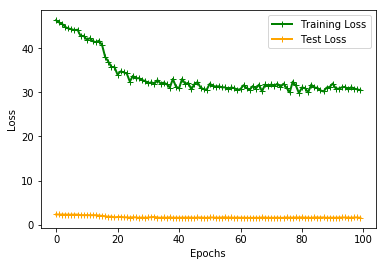

In [34]:
plt.plot(tr_losses, color='green',marker = "+",linewidth=2, label='Training Loss')#, markersize=1)
plt.plot(te_losses, color='orange',marker = "+",linewidth=2, label = "Test Loss")#, markersize=1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()